# Making a corner plot of free parameters

This notebook shows an example of making a corner plot of free model parameters from two COOLEST files/models. A chain file must be contained in the directory of each COOLEST file. In this case we plot the mass model and external shear parameters (they must match between the two COOLEST files, otherwise an exception is raised).

_Note: this notebook is aiming to reproduce fig. 12 from Vernardos & Koopmans (2022)._

__authors__: @gvernard

__created on__: 20/07/23

__last update__: 20/07/23

In [1]:
%config InlineBackend.figure_format = 'retina'

import os
import time
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm, TwoSlopeNorm
from pprint import pprint

from coolest.api.analysis import Analysis
from coolest.api.plotting import ModelPlotter, MultiModelPlotter, plot_corner
from coolest.api import util

In [2]:
def print_info(coolest_object):
    print("Lensing entities:", [type(le).__name__ for le in coolest_object.lensing_entities])

## Load a few COOLEST files

We are loading two COOLEST files, the ones corresponding to fig. 12 in Vernardos & Koopmans (2022). We add a quick check to ensure that each file has a chain file associated to it in the 'meta' field.

In [3]:
model_1_path = 'database/vkl_paper_3.3_dummy/fff_gauss_gauss_n3/VKL_coolest/coolest_vkl'
coolest_1 = util.get_coolest_object(model_1_path, verbose=True, check_external_files=False)
dir_1 = os.path.dirname(model_1_path)
print_info(coolest_1)

model_2_path = 'database/vkl_paper_3.4_dummy/fff_exp_gauss_n3/VKL_coolest/coolest_vkl'
coolest_2 = util.get_coolest_object(model_2_path, verbose=True, check_external_files=False)
dir_2 = os.path.dirname(model_2_path)
print_info(coolest_2)

truth_path = 'database/corner_truth/coolest_vkl'
truth = util.get_coolest_object(truth_path, verbose=True, check_external_files=False)
print_info(truth)

truth_path2 = 'database/corner_truth_2/coolest_vkl'
truth2 = util.get_coolest_object(truth_path2, verbose=True, check_external_files=False)
print_info(truth2)

Failed reading '_pyAPI' template with jsonpickle, now trying with the pure json template (original error: Template file at '/home/giorgos/myCodes/COOLEST/docs/notebooks/database/vkl_paper_3.3_dummy/fff_gauss_gauss_n3/VKL_coolest/coolest_vkl_pyAPI.json' does not exist.)
Lensing entities: ['MassField', 'Galaxy', 'Galaxy', 'Galaxy']
Failed reading '_pyAPI' template with jsonpickle, now trying with the pure json template (original error: Template file at '/home/giorgos/myCodes/COOLEST/docs/notebooks/database/vkl_paper_3.4_dummy/fff_exp_gauss_n3/VKL_coolest/coolest_vkl_pyAPI.json' does not exist.)
Lensing entities: ['MassField', 'Galaxy', 'Galaxy', 'Galaxy']
Failed reading '_pyAPI' template with jsonpickle, now trying with the pure json template (original error: Template file at '/home/giorgos/myCodes/COOLEST/docs/notebooks/database/corner_truth/coolest_vkl_pyAPI.json' does not exist.)
Lensing entities: ['MassField', 'Galaxy', 'Galaxy', 'Galaxy']
Failed reading '_pyAPI' template with jsonpi

## Get the list of free parameters from one of the models

In [4]:
tmp_free_pars = coolest_1.lensing_entities.get_parameter_ids()
#[print(x) for x in tmp_free_pars]
free_pars = tmp_free_pars[:-2] # Remove the last parameters that refer to the light of the source and the perturbations
#print("Removed parameter(s): ",tmp_free_pars[-2:])

# Create a set of labels for the parameters
labels = [
    r"\gamma_{ext}",
    r"\phi_{ext}",
    r"\theta_E",
    r"q",
    r"\phi",
    r"x_0",
    r"y_0"
]

# Re-order parameters
reorder = [2,3,4,5,6,0,1]
pars = [free_pars[i] for i in reorder]
free_pars = pars
tmp_labels = [labels[i] for i in reorder]
par_labels = dict(zip(pars,tmp_labels))

#par_labels = dict(zip(free_pars,labels))

for key,val in par_labels.items():
    print(key," -> ",val)

1-galaxy-mass-0-SIE-theta_E  ->  \theta_E
1-galaxy-mass-0-SIE-q  ->  q
1-galaxy-mass-0-SIE-phi  ->  \phi
1-galaxy-mass-0-SIE-center_x  ->  x_0
1-galaxy-mass-0-SIE-center_y  ->  y_0
0-massfield-mass-0-ExternalShear-gamma_ext  ->  \gamma_{ext}
0-massfield-mass-0-ExternalShear-phi_ext  ->  \phi_{ext}


## Make the corner plot

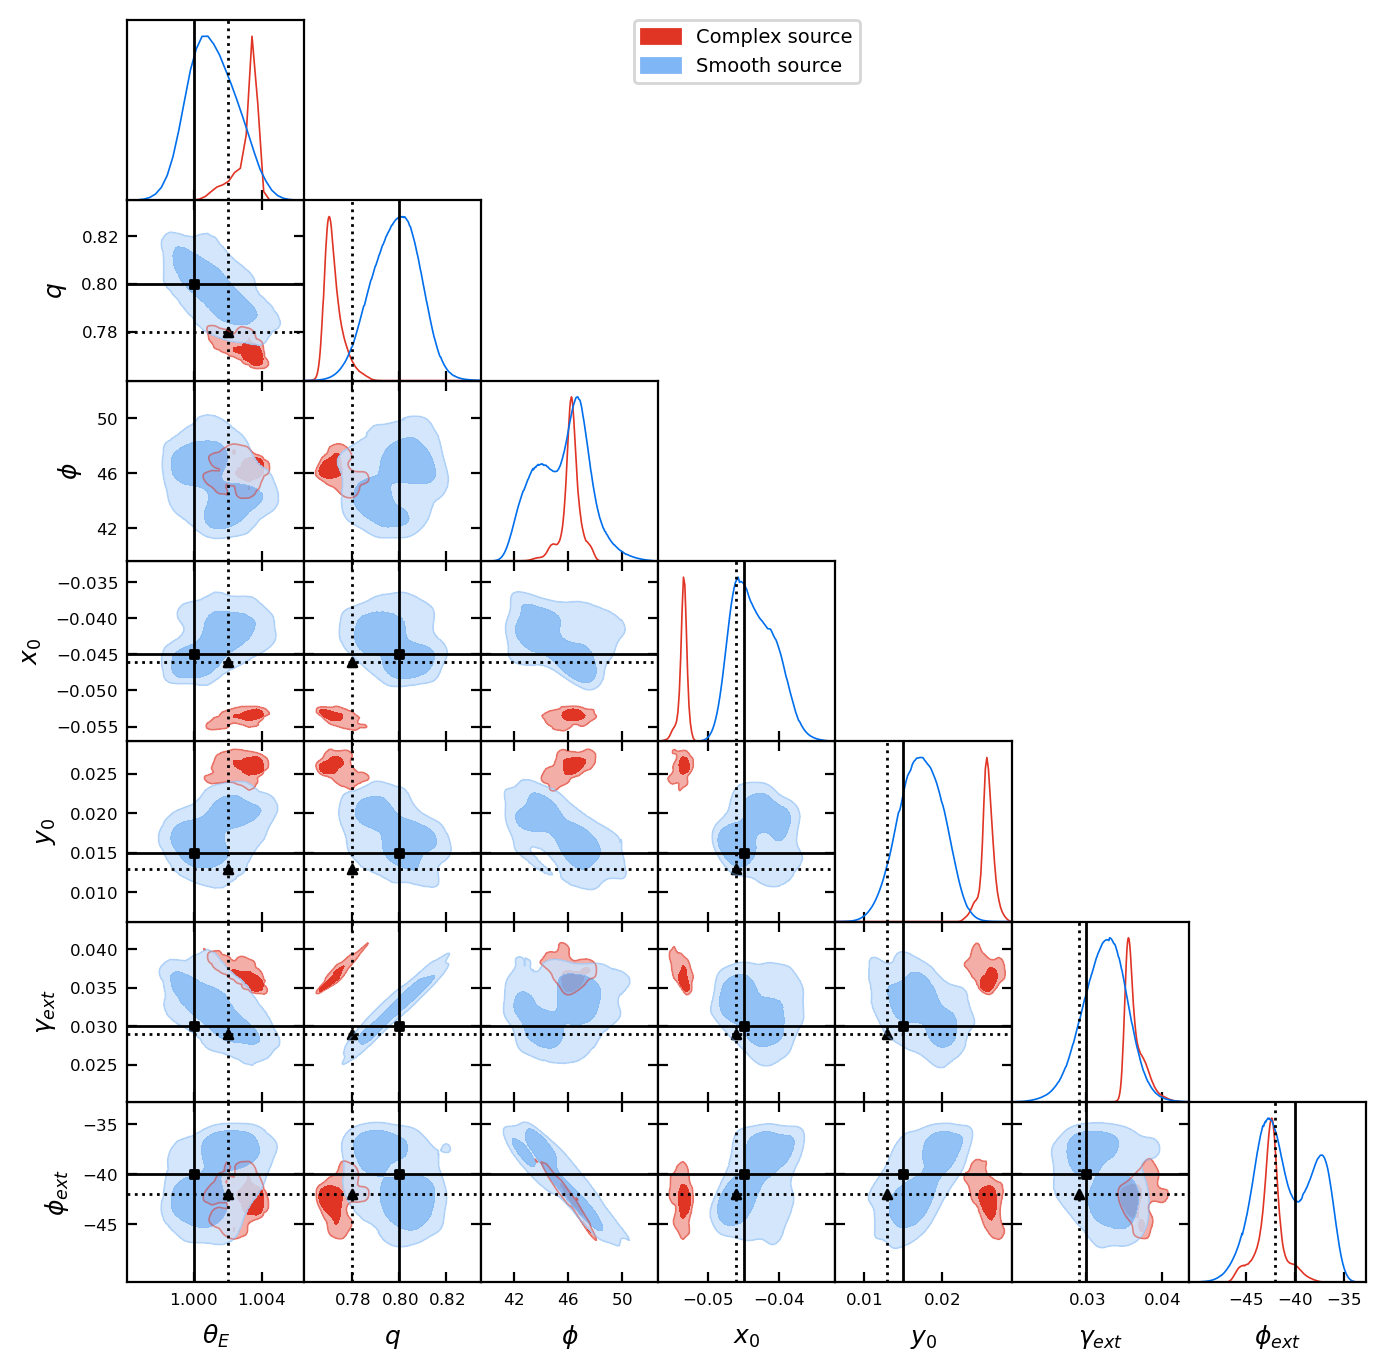

In [8]:
# Capture the image for any further adjustments (it is a GetDistPlotter object)
colors = ['#E03424','#7FB6F5']
settings={"ignore_rows": 0.0,"fine_bins_2D":800,"smooth_scale_2D":0.5,"mult_bias_correction_order":5}
image = plot_corner(free_pars,
                    [coolest_2,coolest_1],
                    [dir_2,dir_1],
                    point_estimate_objs=[truth,truth2],
                    labels=par_labels,
                    chain_names=["Complex source","Smooth source"],
                    colors=colors,
                    mc_samples_kwargs=settings)